# Lectura y graficación de una señal almacenada en un archivo txt

In [111]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import re

## Abrimos el archivo txt para ver  el contenido

In [112]:
f = open("Ejercicio_30segundos.txt","r")
raw_data = f.readline()  # con f.read() leemos todo el contenido
f.close()

raw_data

'# OpenSignals Text File Format. Version 1\n'

In [113]:
## Expresion regular para buscar automaticamente el contenido de un numero dentro de un string
x = re.findall("[0-5][0-9]\d", raw_data)

print(x)

[]


In [114]:
Fs = 1000

## Leemos el archivo excluyendo las 2 primeras filas del archivo

In [115]:
array = np.genfromtxt("./Ejercicio_30segundos.txt", delimiter="	",skip_header = 6)
array

array([[  3.,   0.,   0., ...,   0., 537.,  nan],
       [  4.,   0.,   0., ...,   0., 530.,  nan],
       [  5.,   0.,   0., ...,   0., 523.,  nan],
       ...,
       [  5.,   0.,   0., ...,   0., 423.,  nan],
       [  6.,   0.,   0., ...,   0., 415.,  nan],
       [  7.,   0.,   0., ...,   0., 412.,  nan]])

## Ploteamos la lectura

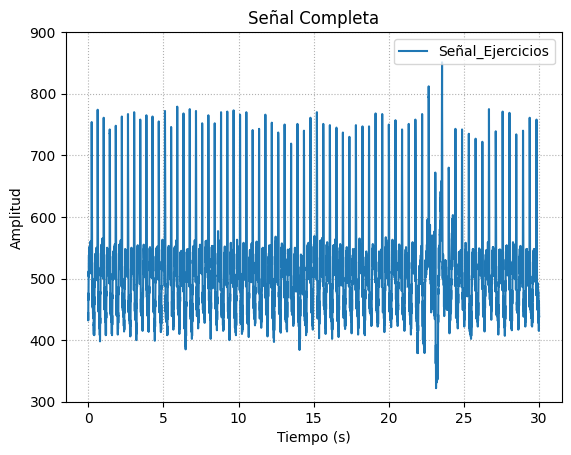

In [116]:
#Tiempo de inicio
Ts = 1/Fs
#Ver donde se contrae
timeall=np.arange(0,len(array[0:30000,5])/1000,Ts)
plt.plot(timeall, array[1000:31000,5], label="Señal_Ejercicios")      # graficamos la señal
plt.ylim(300,900)
plt.grid(linestyle=":")
plt.xlabel("Tiempo (s)")
plt.ylabel("Amplitud")
plt.title("Señal Completa")
plt.legend(loc="upper right")
plt.show()
#graficar

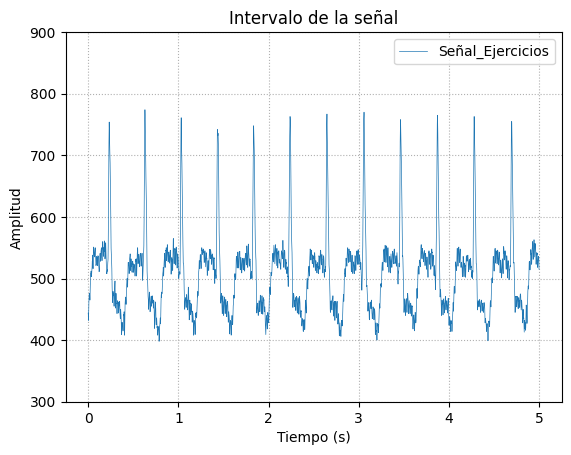

In [117]:
# Ploteamos los sectores que se quieren.
t = np.arange(0,5,Ts)                                   # Domnminio del tieempo
i=1000                                                 # Para seleccionar el tiempo que se quiere
last=5000+i                                             # Esta en ms

plt.plot(t, array[i:last,5], label="Señal_Ejercicios", linewidth = 0.5)      # graficamos la señal
plt.ylim(300,900)
plt.grid(linestyle=":")
plt.xlabel("Tiempo (s)")
plt.ylabel("Amplitud")
plt.title("Intervalo de la señal")
plt.legend(loc="upper right")
plt.show()

## La forma de sabes la frecuencia de la señal es viendo en el dominio de la frecuencia

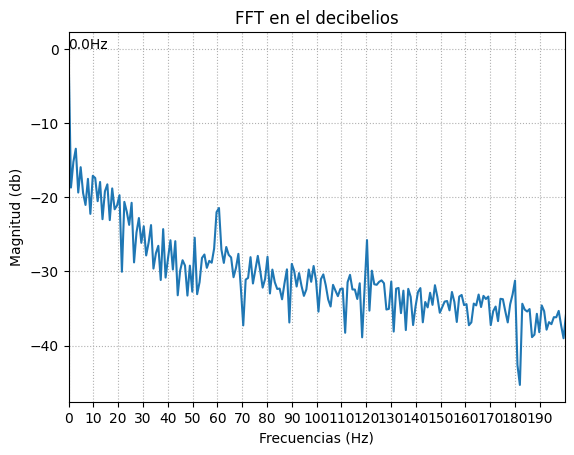

In [118]:
N = 2**10                                     # 10 bits, 0-1023

signal1 = array[1000:31000,5]

signal_fft = np.fft.fft(signal1, N)           # fft magtinud
signal_fft = np.round(np.abs(signal_fft),3)[0:N//2] # nos quedamos con los componente de la derecha de la FFT
signal_aux = signal_fft/signal_fft.max()     # hallamos el maximo para pasar la magnitud a escala db

with np.errstate(divide='ignore'):
    signal_fft_db = 10*np.log10(signal_aux)  # , out=signal_aux, where=signal_aux >= 0 para evitar division por zero

F_list = np.linspace(0,Fs/2, N//2)
F = np.round(F_list[np.argmax(signal_fft_db)], 1)   # argmax, encuentra el argumento max en un array

plt.plot(F_list, signal_fft_db)  #10 * np.log10(P / Pref) , decibelios
plt.text(F,0, f"{F}Hz")
plt.grid(linestyle=":")
plt.ylabel("Magnitud (db)")
plt.xlabel("Frecuencias (Hz)")
plt.title("FFT en el decibelios")
plt.xlim([0,200])
plt.xticks(np.arange(0,200,10))
plt.show()